In [1]:
%matplotlib inline

1. Getting Started with FCN Pre-trained Models
==============================================

This is a quick demo of using GluonCV FCN model on PASCAL VOC dataset.
Please follow the `installation guide <../../index.html#installation>`__
to install MXNet and GluonCV if not yet.


In [2]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



In [3]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
filename = 'example.jpg'
gluoncv.utils.download(url, filename)

'example.jpg'

load the image



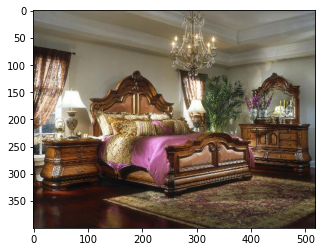

In [29]:
img = image.imread("1_input.jpg")

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [13]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [18]:
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)


self.crop_size 480


make prediction using single scale



In [27]:
output = model.predict(img)
predict = (mx.nd.argmax(output, 1)).asnumpy()

Add color pallete for visualization



In [28]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

TypeError: Cannot handle this data type: (1, 1, 519), |u1

show the predicted mask



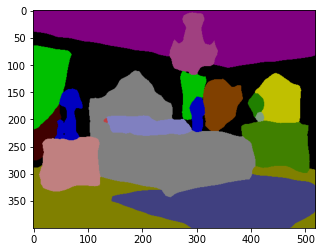

In [21]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

More Examples
 -------------

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/4.jpg)

    :width: 45%

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/4.png)

    :width: 45%

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/5.jpg)

    :width: 45%

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/5.png)

    :width: 45%

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/6.jpg)

    :width: 45%

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/6.png)

    :width: 45%

